In [1]:
from sklearn.datasets import fetch_lfw_people
raw_face = fetch_lfw_people(min_faces_per_person=20,
                            resize=0.5,
                            color=False)

In [2]:
n_samples, h, w = raw_face.images.shape
print(n_samples)
print(h)
print(w)

3023
62
47


In [3]:
X = raw_face.data
n, p = X.shape
print(n)
print(p)


3023
2914


In [4]:
y = raw_face.target
target_names = raw_face.target_names
k = target_names.shape[0]
print(k)

62


In [5]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)

In [7]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=10, random_state=0)
nmf.fit(X_tn)
X_tn_nmf = nmf.transform(X_tn)
X_te_nmf = nmf.transform(X_te)

C:\Users\Jinyoung\.conda\envs\py3_7_6\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
C:\Users\Jinyoung\.conda\envs\py3_7_6\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


### 오리지널 시각화

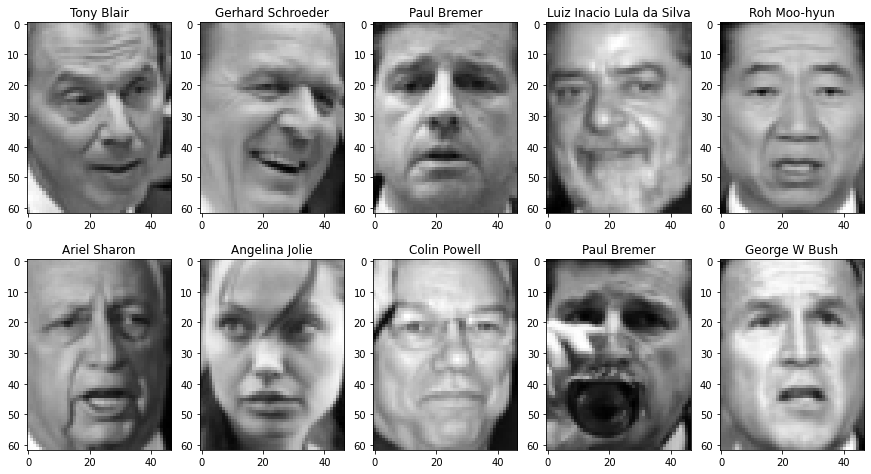

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.gray()
for i in range(2* 5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn[i].reshape((h, w)))
    plt.title(target_names[y_tn[i]])
plt.show()

### 비음수행렬 분해 요소 시각화

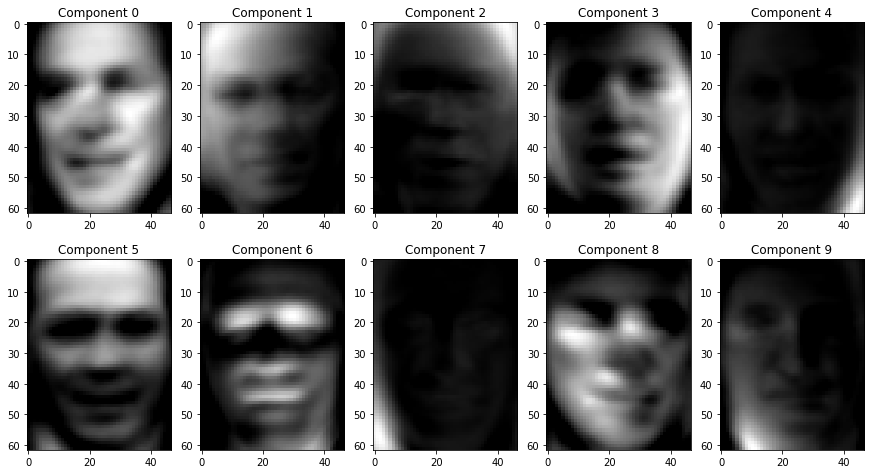

In [11]:
plt.figure(figsize=(15, 8))
plt.gray()
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(nmf.components_[i].reshape((h, w)))
    plt.title("Component {}".format(i))
plt.show()